# **SuperKart Sales Prediction Project**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization to plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Data wrangling and analysis tools
import numpy as np
import pandas as pd
# Let's remove the number of max displayed columns
pd.set_option("display.max_columns", None)
# And set a limit for diplaying rows
pd.set_option("display.max_rows", 100)

# Data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']

# Data preparation tools
from sklearn.model_selection import train_test_split

# Modeling tools
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [2]:
kart = pd.read_csv("Superkart.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

In [4]:
data.head()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114           12.66             Low Sugar                   0.027   
1     FD7839           16.54             Low Sugar                   0.144   
2     FD5075           14.28               Regular                   0.031   
3     FD8233           12.10             Low Sugar                   0.112   
4     NC1180            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total  
0                    2842.40  
1                    4830.02  
2                    4130.16  
3                    4132.18  
4                    2279.36

In [5]:
data.shape

(8763, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


### **Checking for missing values in the dataset** ###

In [7]:
(data.isnull()).sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observations:**
We have no missing values

In [8]:
(data.duplicated()).sum()

0

**Observations:**
There is no, duplicates in the data

## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [9]:
data.describe().T

count         mean          std       min  \
Product_Weight             8763.0    12.653792     2.217320     4.000   
Product_Allocated_Area     8763.0     0.068786     0.048204     0.004   
Product_MRP                8763.0   147.032539    30.694110    31.000   
Store_Establishment_Year   8763.0  2002.032751     8.388381  1987.000   
Product_Store_Sales_Total  8763.0  3464.003640  1065.630494    33.000   

                                25%       50%       75%       max  
Product_Weight               11.150    12.660    14.180    22.000  
Product_Allocated_Area        0.031     0.056     0.096     0.298  
Product_MRP                 126.160   146.740   167.585   266.000  
Store_Establishment_Year   1998.000  2009.000  2009.000  2009.000  
Product_Store_Sales_Total  2761.715  3452.340  4145.165  8000.000

**Observations:**

- The average product weight is 12.65, range casts from 4 to 22, we might have outliers in the data
- The average product allocated area is 0.0688, the range casts from 0.004 to 0.298, again there might be outliers
- The average product MRP is 147.03, the range casts from 31 to 266, there might be outliers
- The average store establishment year is 2002, the range is from 1987 to 2009
- The average product sales for a store is 3464, the range is 33 from 8000, there might be outliers

#### Let's check the count of each unique category in each of the categorical variables

In [10]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

**Observations:**
We see that in Product Sugar Content, the regular category is splitted between reg and Regular. 
It needs to be fixed. 

In [11]:
# Let's replace reg category with Regular in Product_Sugar_Content feature
data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [12]:
# Print the value counts for each class in Product_Sugar_Content feature
print(data['Product_Sugar_Content'].value_counts())

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64


**Observations:**
Now its fine

In [13]:
# Let's extract the first two characters from the Product_Id column and store it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114           12.66             Low Sugar                   0.027   
1     FD7839           16.54             Low Sugar                   0.144   
2     FD5075           14.28               Regular                   0.031   
3     FD8233           12.10             Low Sugar                   0.112   
4     NC1180            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total Product_Id_char  
0                    2842.40              FD  
1                    4830.02              FD  
2                    4130.16              FD  
3                    4132.18              FD  
4                    2279.36              NC

In [14]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

**Let's check product types for each of the extracted categories**

In [15]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique() 

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [16]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique() 

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [17]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique() 

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [18]:
data.drop('Product_Id',axis=1, inplace=True)

In [19]:
data.head()

Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0           12.66             Low Sugar                   0.027   
1           16.54             Low Sugar                   0.144   
2           14.28               Regular                   0.031   
3           12.10             Low Sugar                   0.112   
4            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total Product_Id_char  
0                    2842.40              FD  
1                    4830.02              FD  
2                    4130.16              FD  
3                    4132.18              FD  
4                    2279.36              NC

## **Univariate Analysis**

In [20]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize = (12, 5), kde = False, bins = None):    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 5))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  
        sharex = True, 
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)
    
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet")  
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter") if bins \
    else sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2)  
    
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-")  # Add median to the histogram

**Product_Weight**

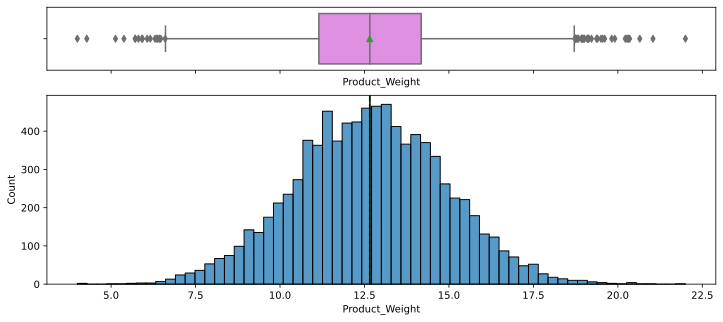

In [21]:
histogram_boxplot(data, "Product_Weight")

**Observations:**

- Product weights are distributed almost normally 
- There might be actual outliers

**Product_Allocated_Area**

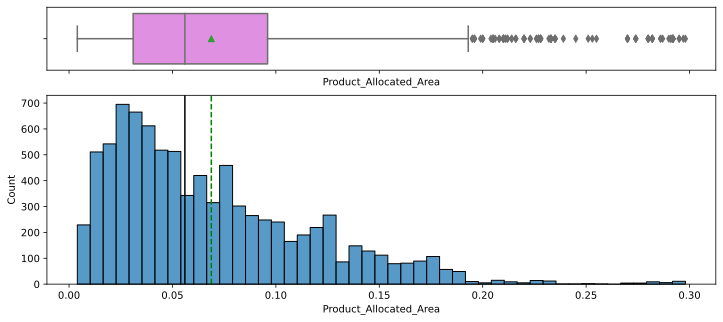

In [22]:
histogram_boxplot(data, "Product_Allocated_Area")

**Observations:**

- Product allocated area has right-skewed distribution 
- There might be actual outliers in the upper range

**Product_MRP**

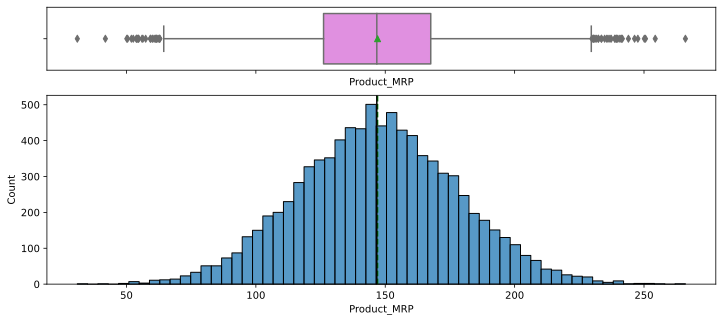

In [23]:
histogram_boxplot(data, "Product_MRP")

**Observations:**

- Product MRP distributed normally 
- There might be actual outliers on the both sides of the range

**Product_Store_Sales_Total**

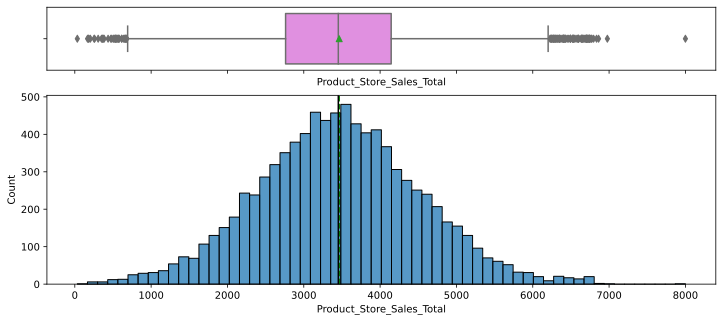

In [24]:
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observations:**

- Product Store Sales distributed normally 
- There might be actual outliers on the both sides of the range

In [25]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count, 5))
    else:
        plt.figure(figsize = (n, 5))

    plt.xticks(rotation=90,fontsize=10)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().sort_values(ascending=False).index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Get to a center of a bar on x axis 
        y = p.get_height()  # Get to the top of a bar on y axis

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 10,
            xytext = (0, 5),
            textcoords = "offset points",
        )  

    plt.show()  

**Product_Sugar_Content**

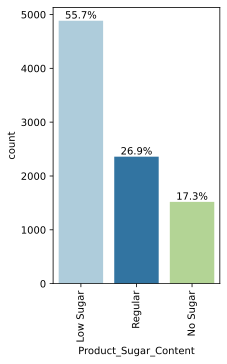

In [26]:
labeled_barplot(data, "Product_Sugar_Content", perc = True)

**Observations:**

- The most presented in the shop products are Low Sugar 


**Product_Type**

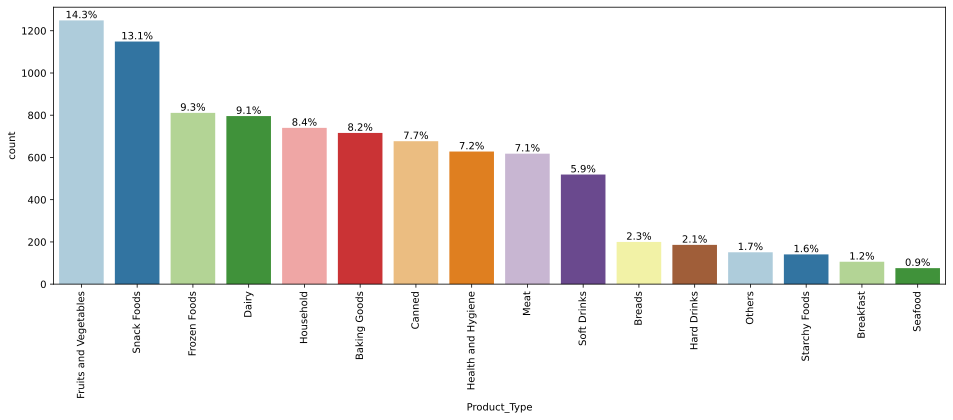

In [27]:
labeled_barplot(data, "Product_Type", perc = True)

**Observations:**

- The most presented categories are Fruits & Vegetables and Snack Foods
- The least presented categoties are Breakfast and Seafood

**Store_Id**

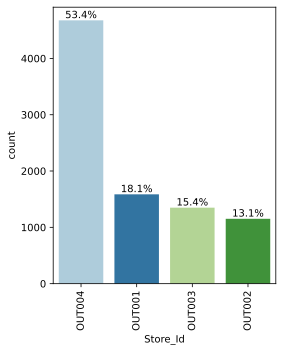

In [28]:
labeled_barplot(data, "Store_Id", perc = True)

**Observations:**

- Store ID  OUT004 is accountable for more than 50% of stores 

**Store_Size**

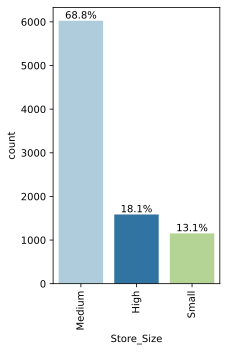

In [29]:
labeled_barplot(data, "Store_Size", perc = True)

**Observations:**

- Medium sized stores are almost 70% of all the stores

**Store_Location_City_Type**

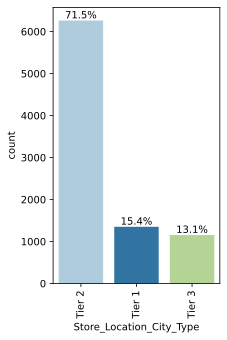

In [30]:
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:**

- Tier 2 store locations have share of more than 70% of all the stores 

**Store_Type**

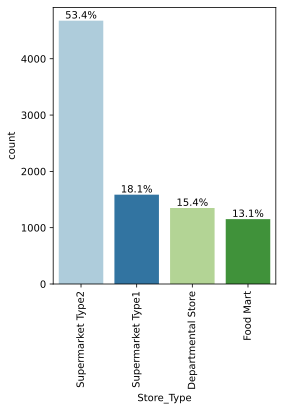

In [31]:
labeled_barplot(data, "Store_Type", perc = True)

**Observations:**


- Supermarket Type2 is accountable for more than 50% of stores 

### **Bivariate Analysis**

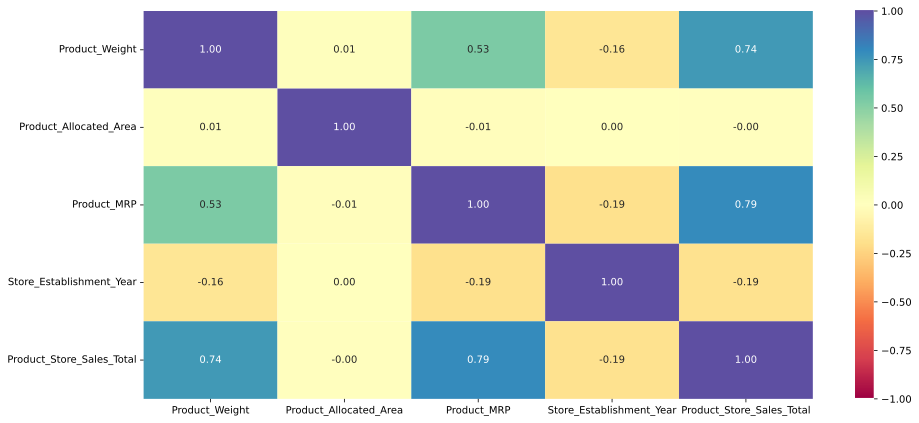

In [32]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

plt.show()

**Observations:**


- There is high positive correlation between:

    - Product_Store_Sales_Total & Product_MRP
    - Product_Store_Sales_Total & Product_Weight

- There is moderate correlation between Product_Weight and Product_MRP
    
    
- Other correlations are either negligeble or slight and meaningless

**Let's visualise the correlations discovered**

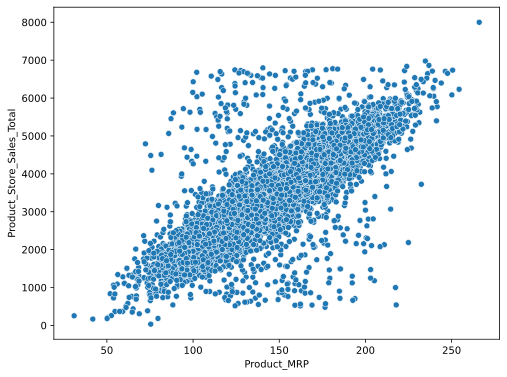

In [33]:
# Let's plot the scatterplot of Product_MRP against Product_Store_Sales_Total
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)
plt.show()

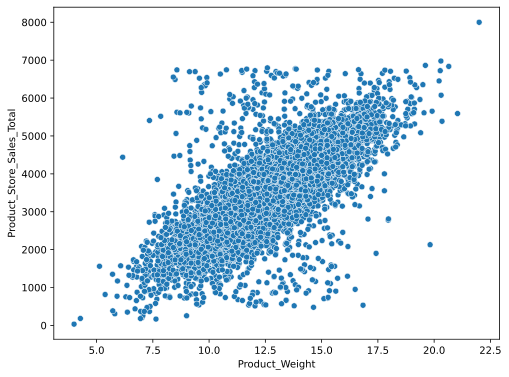

In [34]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)
plt.show()

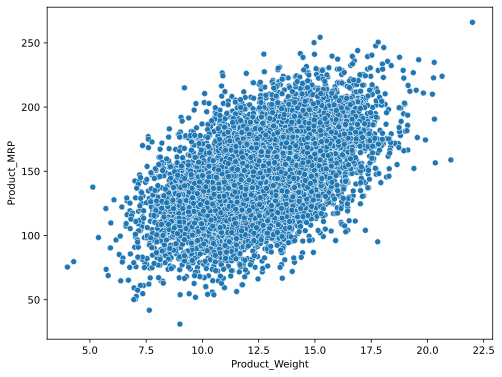

In [35]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Weight, y = data.Product_MRP)
plt.show()

**Observations:**

- We can confirm the conclusions made above

**Let us see from which product type the company is generating most of the revenue**

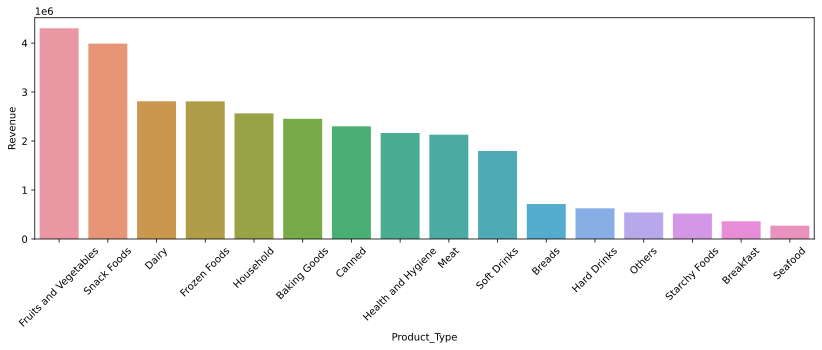

In [36]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [14, 4])
plt.xticks(rotation = 45)
a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total,order=df_revenue1.sort_values('Product_Store_Sales_Total',ascending=False).Product_Type)
a.set_ylabel("Revenue")
plt.show()

**Observations:**

- The biggest revenue is generated by Fruits & Vegetables and Snack Foods categories
- The least revenue is generated by Starchy Foods, Breakfast and Seafood

**Product_Sugar_Content**

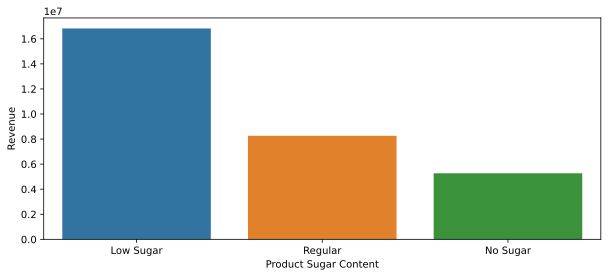

In [37]:
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [10, 4])
plt.xticks(rotation = 0)
a = sns.barplot(x = df_revenue2.Product_Sugar_Content, y = df_revenue2.Product_Store_Sales_Total,
              order = df_revenue2.sort_values('Product_Store_Sales_Total',ascending = False).Product_Sugar_Content)
a.set_xlabel("Product Sugar Content")
a.set_ylabel("Revenue")
plt.show()

**Observations:**

- Low Sugar products generate most of the revenue.
- While No Sugar products generate least of the revenue

**Let's check revenue generation by type of the  stores and locations**

**Store_Id**

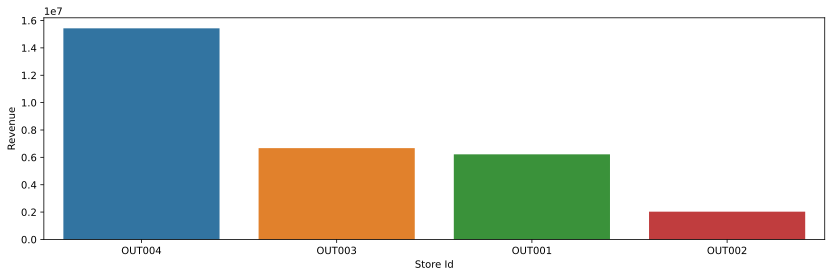

In [38]:
df_revenue3 = data.groupby(["Store_Id"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [14, 4])
plt.xticks(rotation = 0)
a = sns.barplot(x = df_revenue3.Store_Id, y = df_revenue3.Product_Store_Sales_Total, order=df_revenue3.sort_values('Product_Store_Sales_Total', ascending=False).Store_Id)
a.set_xlabel("Store Id")
a.set_ylabel("Revenue")
plt.show()

**Observations:**

- The most of the revenue is generated by Store Id OUT004 and the least is by OUT002

**Store_Size**

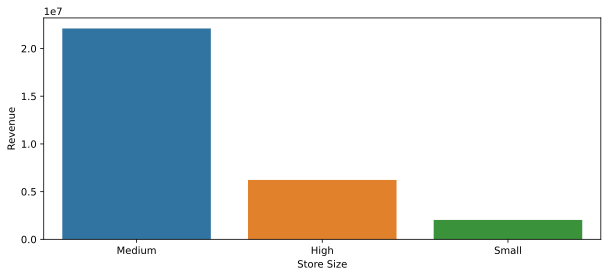

In [39]:
df_revenue4 = data.groupby(["Store_Size"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [10, 4])
plt.xticks(rotation = 0)
a = sns.barplot(x = df_revenue4.Store_Size, y = df_revenue4.Product_Store_Sales_Total, order = df_revenue4.sort_values('Product_Store_Sales_Total', ascending=False).Store_Size)
a.set_xlabel("Store Size")
a.set_ylabel("Revenue")
plt.show()

**Observations:**

- Medium size stores bring the most of the revenue and Small size stores the least.

**Store_Location_City_Type**

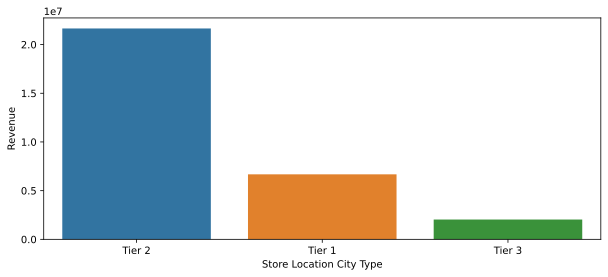

In [40]:
df_revenue5 = data.groupby(["Store_Location_City_Type"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [10, 4])
plt.xticks(rotation = 0)
a = sns.barplot(x = df_revenue5.Store_Location_City_Type, y = df_revenue5.Product_Store_Sales_Total, 
                order=df_revenue5.sort_values('Product_Store_Sales_Total', ascending=False).Store_Location_City_Type)
a.set_xlabel("Store Location City Type")
a.set_ylabel("Revenue")
plt.show()

**Observations:**

- Store Locations Tier 2 generate the most of the revenue and Tier 3 the least.

**Store_Type**

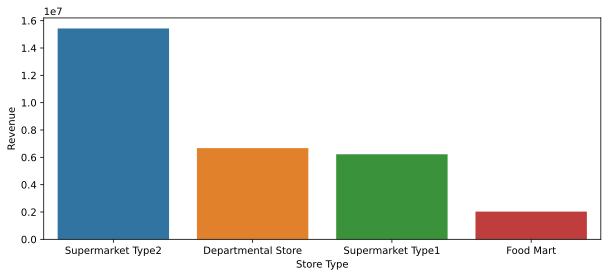

In [41]:
df_revenue6 = data.groupby(["Store_Type"], as_index = False)["Product_Store_Sales_Total"].sum()

plt.figure(figsize = [10, 4])
plt.xticks(rotation = 0)
a = sns.barplot(x = df_revenue6.Store_Type, y = df_revenue6.Product_Store_Sales_Total, order = df_revenue6.sort_values('Product_Store_Sales_Total', ascending = False).Store_Type)
a.set_xlabel("Store Type")
a.set_ylabel("Revenue")
plt.show()

**Observations:**

- The most revenue is brought by Supermarkets Type2 and the least by Food Mart

**Let's check the distribution of our target variable  - Product_Store_Sales_Total with the other categorical columns**

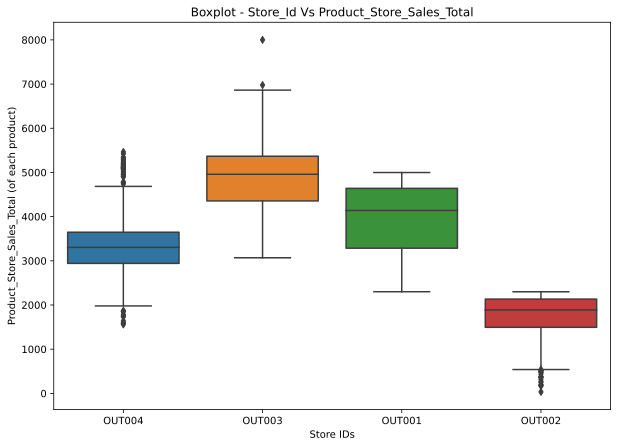

In [42]:
plt.figure(figsize = [10, 7])
sns.boxplot(data=data,x='Store_Id', y='Product_Store_Sales_Total')
plt.xticks(rotation = 0)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Store IDs")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Observations**:

- While Store IDs OUT003  accounts only for sales of only ~ 15% of all the products, the average sales by products is the highest. They might be discounter stock up stores or premium stores. 
- Store Ids OUT002 bring the least average revenue by product

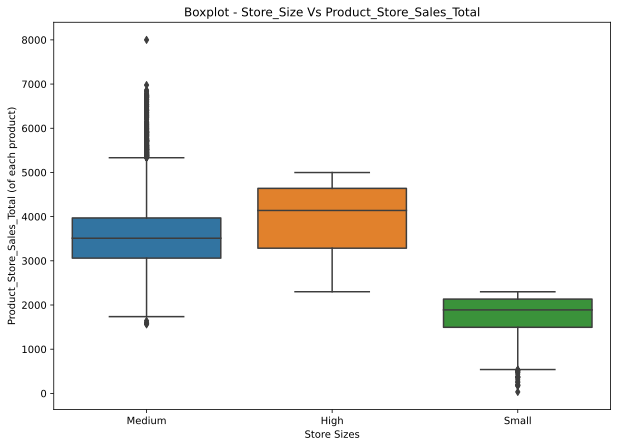

In [43]:
# Let's plot the boxplot of Store size against Product_Store_Sales_Total
plt.figure(figsize = [10, 7])
sns.boxplot(data=data,x='Store_Size', y='Product_Store_Sales_Total')
plt.xticks(rotation = 0)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Store Sizes")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Observations:**

- The average sales by product is the highest in High Size store and the least in Small stores, which looks very logical. 

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look**

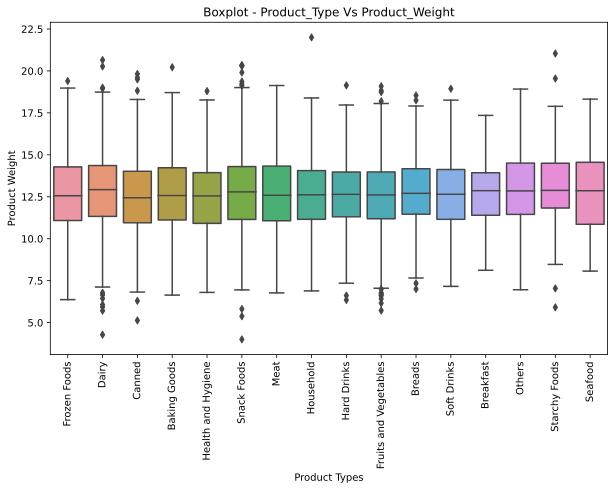

In [44]:
# Let's plot the boxplot of Product_Type against Product_Weight
plt.figure(figsize = [10, 6])
sns.boxplot(data=data,x='Product_Type', y='Product_Weight')
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_Weight")
plt.xlabel("Product Types")
plt.ylabel("Product Weight")
plt.show()

**Observations:**

- The median weight for each type of the product is almost equal
- Weight ranges slightly vary between different types. The Seafood has the highest range and Breakfast the lowest. 

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

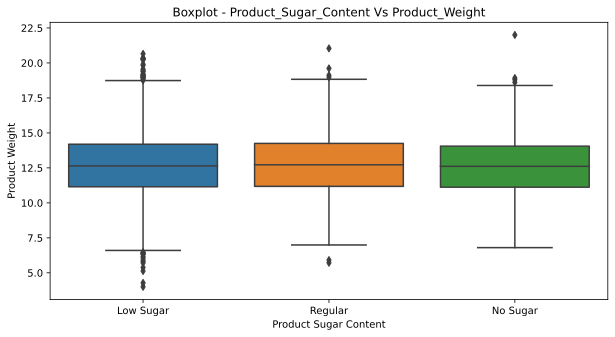

In [45]:
# Let's plot the boxplot of Product_Sugar_Content against Product_Weight
plt.figure(figsize = [10, 5])
sns.boxplot(data=data,x='Product_Sugar_Content', y='Product_Weight')
plt.xticks(rotation = 0)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product Sugar Content")
plt.ylabel("Product Weight")
plt.show()

**Observations:**

- Again weight median and ranges are very consistent between products with different Sugar Content.

**Let's analyze the sugar content of different product types**

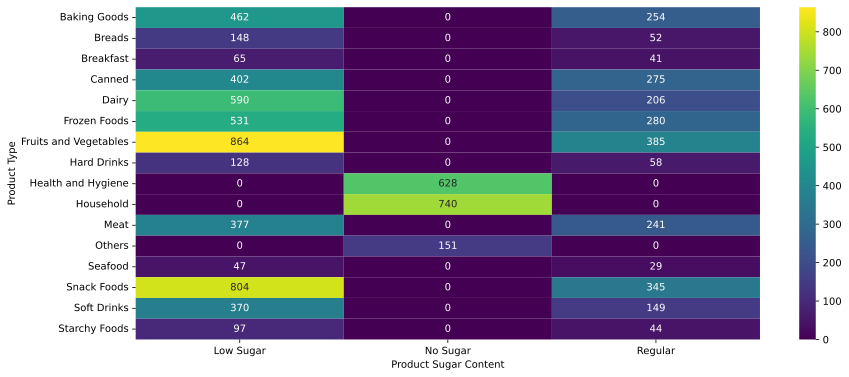

In [46]:
plt.figure(figsize = (14, 6))

sns.heatmap(
    pd.crosstab(data["Product_Type"],data["Product_Sugar_Content"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product Type")
plt.xlabel("Product Sugar Content")

plt.show()

**Observations:**

- The Health and Hygiene, Households and Others are the only product types which have no sugar in them. Which makes perfect sense. 

#### Let's find out how many items of each product type has been sold in each of the stores

In [47]:
pd.crosstab(data["Product_Type"], data["Store_Id"])

Store_Id               OUT001  OUT002  OUT003  OUT004
Product_Type                                         
Baking Goods              136      96      99     385
Breads                     30      23      34     113
Breakfast                  10      15      19      62
Canned                    119      88      90     380
Dairy                     150     104     145     397
Frozen Foods              142     101     122     446
Fruits and Vegetables     199     168     182     700
Hard Drinks                38      30      23      95
Health and Hygiene        114      91      89     334
Household                 134     100     107     399
Meat                      130      87     106     295
Others                     31      19      32      69
Seafood                    13      10      13      40
Snack Foods               202     146     186     615
Soft Drinks               106      62      74     277
Starchy Foods              32      12      28      69

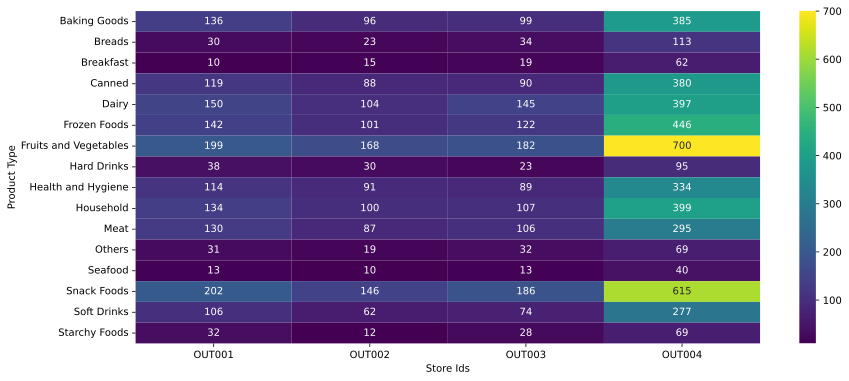

In [48]:
# Let's plot heatmap with and Product_Type as x and Store_Ids as y
plt.figure(figsize = (14, 6))

sns.heatmap(
    pd.crosstab(data["Product_Type"], data["Store_Id"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product Type")
plt.xlabel("Store Ids")
plt.show()

**Observations:**

- The highest frequency of all the product types sold is by Store Ids OUT004 and the least by OUT002

#### Different product types have different prices. Let's analyze the trend

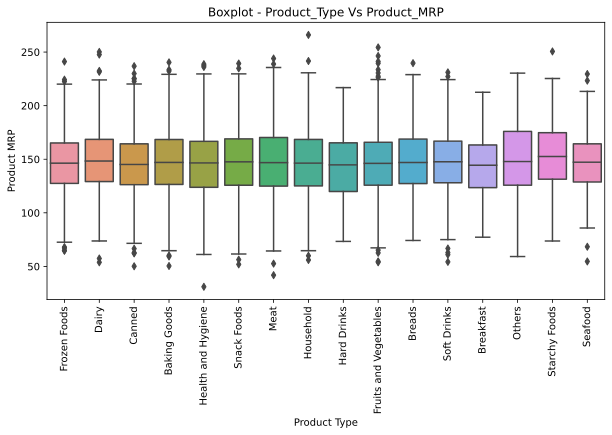

In [49]:
# Let's plot a boxplot of Product_Type against Product_MRP
plt.figure(figsize = [10, 5])
sns.boxplot(data=data,x='Product_Type', y='Product_MRP')
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product Type")
plt.ylabel("Product MRP")
plt.show()

**Observations:**

- We see that median Product MRP and its range is very consistent across different product types.

#### Let's find out how the Product_MRP varies with the different stores

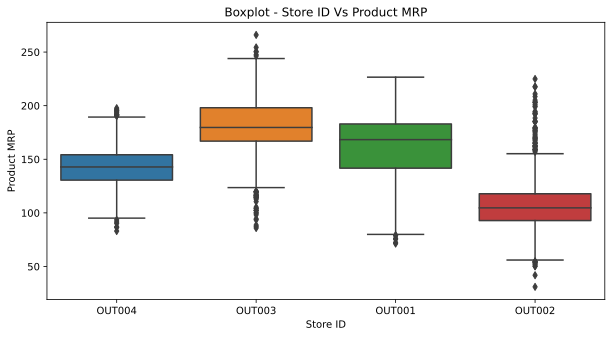

In [50]:
# Let's plot the boxplot of Store_Id against Product_MRP
plt.figure(figsize = [10, 5])
sns.boxplot(data=data,x='Store_Id', y='Product_MRP')
plt.xticks(rotation = 0)
plt.title("Boxplot - Store ID Vs Product MRP")
plt.xlabel("Store ID")
plt.ylabel("Product MRP")
plt.show()

**Observations:**

- The Store ID OUT003 has the highest median Product MRP, so we can conclude these are the Premium Stores. 

**Let's delve deeper and do a detailed analysis of each of the stores**

**OUT001**

In [51]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T 

count unique                top  freq  \
Product_Weight             1586.0    NaN                NaN   NaN   
Product_Sugar_Content        1586      3          Low Sugar   845   
Product_Allocated_Area     1586.0    NaN                NaN   NaN   
Product_Type                 1586     16        Snack Foods   202   
Product_MRP                1586.0    NaN                NaN   NaN   
Store_Id                     1586      1             OUT001  1586   
Store_Establishment_Year   1586.0    NaN                NaN   NaN   
Store_Size                   1586      1               High  1586   
Store_Location_City_Type     1586      1             Tier 2  1586   
Store_Type                   1586      1  Supermarket Type1  1586   
Product_Store_Sales_Total  1586.0    NaN                NaN   NaN   
Product_Id_char              1586      3                 FD  1163   

                                  mean        std      min      25%       50%  \
Product_Weight               13.458865   2.064975     6.16  12.0525     13.96   
Product_Sugar_Content              NaN        NaN      NaN      NaN       NaN   
Product_Allocated_Area        0.068768   0.047131    0.004    0.033    0.0565   
Product_Type                       NaN        NaN      NaN      NaN       NaN   
Product_MRP                 160.514054  30.359059    71.35   141.72    168.32   
Store_Id                           NaN        NaN      NaN      NaN       NaN   
Store_Establishment_Year        1987.0        0.0   1987.0   1987.0    1987.0   
Store_Size                         NaN        NaN      NaN      NaN       NaN   
Store_Location_City_Type           NaN        NaN      NaN      NaN       NaN   
Store_Type                         NaN        NaN      NaN      NaN       NaN   
Product_Store_Sales_Total  3923.778802  904.62901  2300.56  3285.51  4139.645   
Product_Id_char                    NaN        NaN      NaN      NaN       NaN   

                                75%      max  
Product_Weight                14.95    17.97  
Product_Sugar_Content           NaN      NaN  
Product_Allocated_Area        0.094    0.295  
Product_Type                    NaN      NaN  
Product_MRP                182.9375   226.59  
Store_Id                        NaN      NaN  
Store_Establishment_Year     1987.0   1987.0  
Store_Size                      NaN      NaN  
Store_Location_City_Type        NaN      NaN  
Store_Type                      NaN      NaN  
Product_Store_Sales_Total    4639.4  4997.63  
Product_Id_char                 NaN      NaN

In [52]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

**Observations:**

- The most often sold product in Store ID OUT001 is Snack Foods And the most often products sold are the products with Low Sugar content. 
- The MRP for OUT001 ranges from 71 to 227
- OUT001 are Supermarket Type1 stores located in Tier 2 City Areas with High Store Size
- Average sales per product are 3924

In [53]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

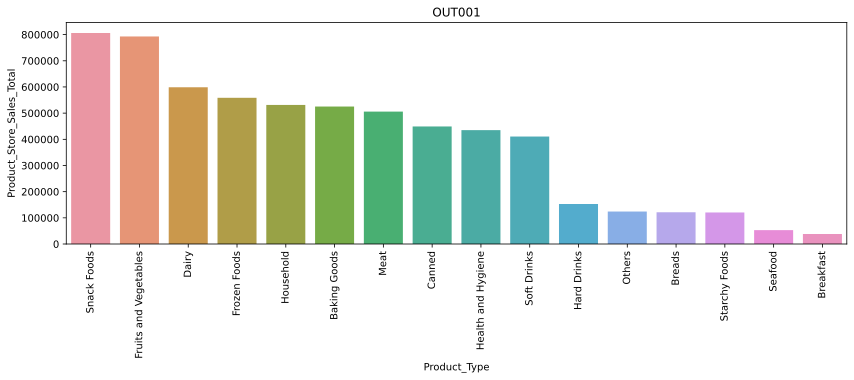

In [54]:
plt.figure(figsize = [14, 4])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total,order = df_OUT001.sort_values('Product_Store_Sales_Total',ascending=False).Product_Type)
plt.show()

**Observations:**

- The most revenue is generated by Snack Foods and Fruit & Vegetables
- The least revenue is generated by Seafood and Breakfast

**OUT002**

In [55]:
data[data['Store_Id']=='OUT002'].describe(include='all').T

count unique                    top  freq  \
Product_Weight             1152.0    NaN                    NaN   NaN   
Product_Sugar_Content        1152      3              Low Sugar   658   
Product_Allocated_Area     1152.0    NaN                    NaN   NaN   
Product_Type                 1152     16  Fruits and Vegetables   168   
Product_MRP                1152.0    NaN                    NaN   NaN   
Store_Id                     1152      1                 OUT002  1152   
Store_Establishment_Year   1152.0    NaN                    NaN   NaN   
Store_Size                   1152      1                  Small  1152   
Store_Location_City_Type     1152      1                 Tier 3  1152   
Store_Type                   1152      1              Food Mart  1152   
Product_Store_Sales_Total  1152.0    NaN                    NaN   NaN   
Product_Id_char              1152      3                     FD   850   

                                  mean         std     min        25%  \
Product_Weight                9.911241    1.799846     4.0     8.7675   
Product_Sugar_Content              NaN         NaN     NaN        NaN   
Product_Allocated_Area        0.067747    0.047567   0.006      0.031   
Product_Type                       NaN         NaN     NaN        NaN   
Product_MRP                 107.080634   24.912333    31.0    92.8275   
Store_Id                           NaN         NaN     NaN        NaN   
Store_Establishment_Year        1998.0         0.0  1998.0     1998.0   
Store_Size                         NaN         NaN     NaN        NaN   
Store_Location_City_Type           NaN         NaN     NaN        NaN   
Store_Type                         NaN         NaN     NaN        NaN   
Product_Store_Sales_Total  1762.942465  462.862431    33.0  1495.4725   
Product_Id_char                    NaN         NaN     NaN        NaN   

                                50%        75%      max  
Product_Weight                9.795      10.89    19.82  
Product_Sugar_Content           NaN        NaN      NaN  
Product_Allocated_Area       0.0545    0.09525    0.292  
Product_Type                    NaN        NaN      NaN  
Product_MRP                 104.675   117.8175   224.93  
Store_Id                        NaN        NaN      NaN  
Store_Establishment_Year     1998.0     1998.0   1998.0  
Store_Size                      NaN        NaN      NaN  
Store_Location_City_Type        NaN        NaN      NaN  
Store_Type                      NaN        NaN      NaN  
Product_Store_Sales_Total  1889.495  2133.6225  2299.63  
Product_Id_char                 NaN        NaN      NaN

In [56]:
data[data['Store_Id']=='OUT002']['Product_Store_Sales_Total'].sum()

2030909.72

**Observations:**

- The most often sold product in Store ID OUT002 is Fruits and Vegetables 
- The MRP for OUT002 ranges from 31 to 225
- OUT002 are Food Mart stores located in Tier 3 City Areas with Small Store Size
- Average Sales per product are 1762 which is more then twice less than in OUT001

In [57]:
df_OUT002 = (
    data.loc[data['Store_Id'] == 'OUT002']
    .groupby(['Product_Type'], as_index = False)['Product_Store_Sales_Total']
    .sum()
)

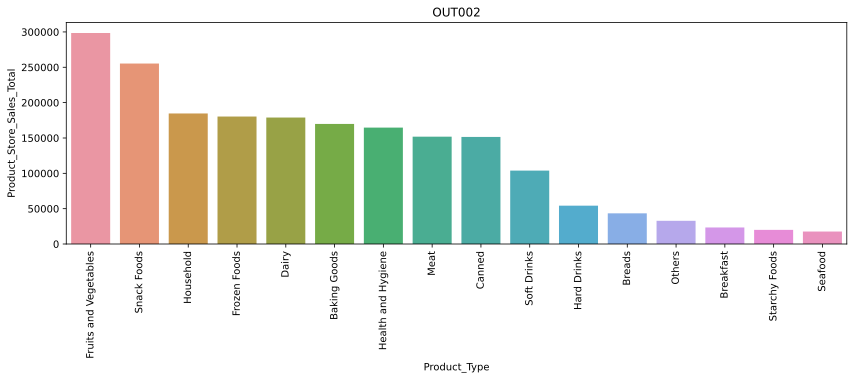

In [58]:
plt.figure(figsize = [14,4])
plt.xticks(rotation = 90)
plt.xlabel('Product_Type')
plt.ylabel('Product_Store_Sales_Total')
plt.title('OUT002')
sns.barplot(x = df_OUT002.Product_Type, y = df_OUT002.Product_Store_Sales_Total, order = df_OUT002.sort_values('Product_Store_Sales_Total',ascending = False).Product_Type)
plt.show()

**Observations:**

- The most revenue is generated by Fruit & Vegetables and Snack Foods
- The least revenue is generated by Starchy Foods and Seafood

**OUT003**

In [59]:
data[data['Store_Id'] == 'OUT003'].describe(include = 'all').T

count unique                 top  freq  \
Product_Weight             1349.0    NaN                 NaN   NaN   
Product_Sugar_Content        1349      3           Low Sugar   750   
Product_Allocated_Area     1349.0    NaN                 NaN   NaN   
Product_Type                 1349     16         Snack Foods   186   
Product_MRP                1349.0    NaN                 NaN   NaN   
Store_Id                     1349      1              OUT003  1349   
Store_Establishment_Year   1349.0    NaN                 NaN   NaN   
Store_Size                   1349      1              Medium  1349   
Store_Location_City_Type     1349      1              Tier 1  1349   
Store_Type                   1349      1  Departmental Store  1349   
Product_Store_Sales_Total  1349.0    NaN                 NaN   NaN   
Product_Id_char              1349      3                  FD  1024   

                                  mean         std      min      25%      50%  \
Product_Weight               15.103692    1.893531     7.35    14.02    15.18   
Product_Sugar_Content              NaN         NaN      NaN      NaN      NaN   
Product_Allocated_Area        0.068637    0.048708    0.004    0.031    0.057   
Product_Type                       NaN         NaN      NaN      NaN      NaN   
Product_MRP                 181.358725   24.796429    85.88   166.92   179.67   
Store_Id                           NaN         NaN      NaN      NaN      NaN   
Store_Establishment_Year        1999.0         0.0   1999.0   1999.0   1999.0   
Store_Size                         NaN         NaN      NaN      NaN      NaN   
Store_Location_City_Type           NaN         NaN      NaN      NaN      NaN   
Store_Type                         NaN         NaN      NaN      NaN      NaN   
Product_Store_Sales_Total  4946.966323  677.539953  3069.24  4355.39  4958.29   
Product_Id_char                    NaN         NaN      NaN      NaN      NaN   

                               75%     max  
Product_Weight               16.35    22.0  
Product_Sugar_Content          NaN     NaN  
Product_Allocated_Area       0.094   0.298  
Product_Type                   NaN     NaN  
Product_MRP                 198.07   266.0  
Store_Id                       NaN     NaN  
Store_Establishment_Year    1999.0  1999.0  
Store_Size                     NaN     NaN  
Store_Location_City_Type       NaN     NaN  
Store_Type                     NaN     NaN  
Product_Store_Sales_Total  5366.59  8000.0  
Product_Id_char                NaN     NaN

In [60]:
data[data['Store_Id'] == 'OUT003']['Product_Store_Sales_Total'].sum()

6673457.57

**Observations:**

- The most often sold product in Store ID OUT003 is Snack Foods 
- The MRP for OUT003 ranges from 86 to 266
- OUT003 are Departmental stores located in Tier 1 City Areas with Medium Store Size
- Average Sales per product are 5000 which is much more than in OUT001 and OUT002
- Again we can confirm that OUT003 are premium stores

In [61]:
df_OUT003 = (
    data.loc[data['Store_Id'] == 'OUT003']
    .groupby(['Product_Type'], as_index = False)['Product_Store_Sales_Total']
    .sum()
)

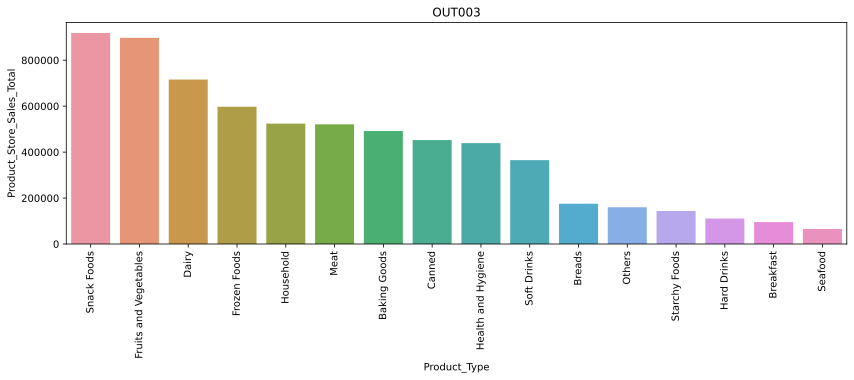

In [62]:
plt.figure(figsize = [14,4])
plt.xticks(rotation = 90)
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales Total')
plt.title('OUT003')
sns.barplot(x = df_OUT003.Product_Type, y = df_OUT003.Product_Store_Sales_Total, order = df_OUT003.sort_values('Product_Store_Sales_Total', ascending = False).Product_Type)
plt.show()

**Observations:**

- The most revenue is generated by Snack Foods and Fruits & Vegetables
- The least revenue is generated by Breakfast and Seafood

**OUT004**

In [63]:
data[data['Store_Id'] == 'OUT004'].describe(include = 'all').T

count unique                    top  freq  \
Product_Weight             4676.0    NaN                    NaN   NaN   
Product_Sugar_Content        4676      3              Low Sugar  2632   
Product_Allocated_Area     4676.0    NaN                    NaN   NaN   
Product_Type                 4676     16  Fruits and Vegetables   700   
Product_MRP                4676.0    NaN                    NaN   NaN   
Store_Id                     4676      1                 OUT004  4676   
Store_Establishment_Year   4676.0    NaN                    NaN   NaN   
Store_Size                   4676      1                 Medium  4676   
Store_Location_City_Type     4676      1                 Tier 2  4676   
Store_Type                   4676      1      Supermarket Type2  4676   
Product_Store_Sales_Total  4676.0    NaN                    NaN   NaN   
Product_Id_char              4676      3                     FD  3502   

                                  mean         std      min       25%  \
Product_Weight               12.349613    1.428199     7.34     11.37   
Product_Sugar_Content              NaN         NaN      NaN       NaN   
Product_Allocated_Area        0.069092    0.048584    0.004     0.031   
Product_Type                       NaN         NaN      NaN       NaN   
Product_MRP                 142.399709   17.513973    83.04    130.54   
Store_Id                           NaN         NaN      NaN       NaN   
Store_Establishment_Year        2009.0         0.0   2009.0    2009.0   
Store_Size                         NaN         NaN      NaN       NaN   
Store_Location_City_Type           NaN         NaN      NaN       NaN   
Store_Type                         NaN         NaN      NaN       NaN   
Product_Store_Sales_Total  3299.312111  468.271692  1561.06  2942.085   
Product_Id_char                    NaN         NaN      NaN       NaN   

                               50%        75%      max  
Product_Weight               12.37    13.3025    17.79  
Product_Sugar_Content          NaN        NaN      NaN  
Product_Allocated_Area       0.056      0.097    0.297  
Product_Type                   NaN        NaN      NaN  
Product_MRP                 142.82   154.1925   197.66  
Store_Id                       NaN        NaN      NaN  
Store_Establishment_Year    2009.0     2009.0   2009.0  
Store_Size                     NaN        NaN      NaN  
Store_Location_City_Type       NaN        NaN      NaN  
Store_Type                     NaN        NaN      NaN  
Product_Store_Sales_Total  3304.18  3646.9075  5462.86  
Product_Id_char                NaN        NaN      NaN

In [64]:
data[data['Store_Id'] == 'OUT004']['Product_Store_Sales_Total'].sum()

15427583.43

**Observations:**

- The most often sold product in Store ID OUT004 is Fruits and Vegetables 
- The MRP for OUT004 ranges from 83 to 198
- OUT004 are Supermarket Type2 stores located in Tier 2 City Areas with Medium Store Size
- Average Sales per product are 3300 which is more in OUT002 but less than in OUT001 and OUT003
- This store IDs generate most of the company revenue

In [65]:
df_OUT004 = (data.loc[data['Store_Id'] == 'OUT004']
    .groupby(['Product_Type'], as_index = False)
    ['Product_Store_Sales_Total'].sum()    
)

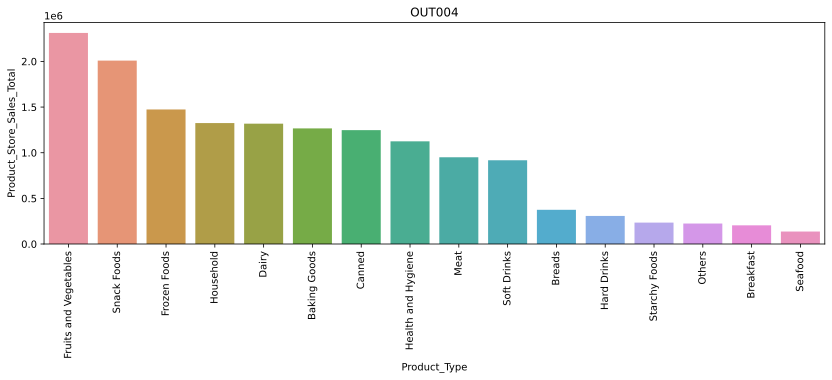

In [66]:
plt.figure(figsize = [14,4])
plt.xticks(rotation = 90)
plt.xlabel('Product Type')
plt.ylabel('Product Store Sales Total')
plt.title('OUT004')
sns.barplot(x = df_OUT004.Product_Type, y = df_OUT004.Product_Store_Sales_Total, order = df_OUT004.sort_values('Product_Store_Sales_Total', ascending = False).Product_Type)
plt.show()

**Observations:**

- The most revenue is generated by Fruits & Vegetables and Snack Foods
- The least revenue is generated by Breakfast and Seafood

#### Let's find out the revenue generated by the stores from each of the product types

In [67]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

df1

Product_Type Store_Id  Product_Store_Sales_Total
0            Baking Goods   OUT001                  525131.04
1            Baking Goods   OUT002                  169860.50
2            Baking Goods   OUT003                  491908.20
3            Baking Goods   OUT004                 1266086.26
4                  Breads   OUT001                  121274.09
5                  Breads   OUT002                   43419.47
6                  Breads   OUT003                  175391.93
7                  Breads   OUT004                  374856.75
8               Breakfast   OUT001                   38161.10
9               Breakfast   OUT002                   23396.10
10              Breakfast   OUT003                   95634.08
11              Breakfast   OUT004                  204939.13
12                 Canned   OUT001                  449016.38
13                 Canned   OUT002                  151467.66
14                 Canned   OUT003                  452445.17
15                 Canned   OUT004                 1247153.50
16                  Dairy   OUT001                  598767.62
17                  Dairy   OUT002                  178888.18
18                  Dairy   OUT003                  715814.94
19                  Dairy   OUT004                 1318447.30
20           Frozen Foods   OUT001                  558556.81
21           Frozen Foods   OUT002                  180295.95
22           Frozen Foods   OUT003                  597608.42
23           Frozen Foods   OUT004                 1473519.65
24  Fruits and Vegetables   OUT001                  792992.59
25  Fruits and Vegetables   OUT002                  298503.56
26  Fruits and Vegetables   OUT003                  897437.46
27  Fruits and Vegetables   OUT004                 2311899.66
28            Hard Drinks   OUT001                  152920.74
29            Hard Drinks   OUT002                   54281.85
30            Hard Drinks   OUT003                  110760.30
31            Hard Drinks   OUT004                  307851.73
32     Health and Hygiene   OUT001                  435005.31
33     Health and Hygiene   OUT002                  164660.81
34     Health and Hygiene   OUT003                  439139.18
35     Health and Hygiene   OUT004                 1124901.91
36              Household   OUT001                  531371.38
37              Household   OUT002                  184665.65
38              Household   OUT003                  523981.64
39              Household   OUT004                 1324721.50
40                   Meat   OUT001                  505867.28
41                   Meat   OUT002                  151800.01
42                   Meat   OUT003                  520939.68
43                   Meat   OUT004                  950604.97
44                 Others   OUT001                  123977.09
45                 Others   OUT002                   32835.73
46                 Others   OUT003                  159963.75
47                 Others   OUT004                  224719.73
48                Seafood   OUT001                   52936.84
49                Seafood   OUT002                   17663.35
50                Seafood   OUT003                   65337.48
51                Seafood   OUT004                  136466.37
52            Snack Foods   OUT001                  806142.24
53            Snack Foods   OUT002                  255317.57
54            Snack Foods   OUT003                  918510.44
55            Snack Foods   OUT004                 2009026.70
56            Soft Drinks   OUT001                  410548.69
57            Soft Drinks   OUT002                  103808.35
58            Soft Drinks   OUT003                  365046.30
59            Soft Drinks   OUT004                  917641.38
60          Starchy Foods   OUT001                  120443.98
61          Starchy Foods   OUT002                   20044.98
62          Starchy Foods   OUT003                  143538.60
63          Starchy Foods   OUT004           

**Observations:**

- As we saw earlier of all the Store Ids OUT004 generates the most revenue in all of the product types. 
- In all of the categories the least revenue was generated by OUT002

#### Let's find out the revenue generated by the stores from products having different levels of sugar content

In [68]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index = False )['Product_Store_Sales_Total'].sum()  
df2

Product_Sugar_Content Store_Id  Product_Store_Sales_Total
0              Low Sugar   OUT001                 3300834.93
1              Low Sugar   OUT002                 1156758.85
2              Low Sugar   OUT003                 3706903.24
3              Low Sugar   OUT004                 8658908.78
4               No Sugar   OUT001                 1090353.78
5               No Sugar   OUT002                  382162.19
6               No Sugar   OUT003                 1123084.57
7               No Sugar   OUT004                 2674343.14
8                Regular   OUT001                 1831924.47
9                Regular   OUT002                  491988.68
10               Regular   OUT003                 1843469.76
11               Regular   OUT004                 4094331.51

**Observations:**

- The relationships are the same as in the table by product types

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.(The data of the sales records was collected in 2021, so we will use 2021 as the base year to calculate the store age)**

In [69]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data.Store_Establishment_Year
data.head()

Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0           12.66             Low Sugar                   0.027   
1           16.54             Low Sugar                   0.144   
2           14.28               Regular                   0.031   
3           12.10             Low Sugar                   0.112   
4            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total Product_Id_char  Store_Age_Years  
0                    2842.40              FD               12  
1                    4830.02              FD               22  
2                    4130.16              FD               34  
3                    4132.18              FD               34  
4                    2279.36              NC               23

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [70]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [71]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [72]:
data["Product_Type_Category"] = pd.Series(change1)

In [73]:
data.head()

Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0           12.66             Low Sugar                   0.027   
1           16.54             Low Sugar                   0.144   
2           14.28               Regular                   0.031   
3           12.10             Low Sugar                   0.112   
4            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total Product_Id_char  Store_Age_Years  \
0                    2842.40              FD               12   
1                    4830.02              FD               22   
2                    4130.16              FD               34   
3                    4132.18              FD               34   
4                    2279.36              NC               23   

  Product_Type_Category  
0       Non Perishables  
1           Perishables  
2       Non Perishables  
3       Non Perishables  
4       Non Perishables

In [74]:
data["Product_Type_Category"].unique()

array(['Non Perishables', 'Perishables'], dtype=object)

### **Outlier Check**

- Let's check for outliers in the data.

In [75]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()
# Remove non-relevant columns from the numeric columns
numeric_columns.remove("Store_Establishment_Year") 
numeric_columns.remove("Store_Age_Years")
len(numeric_columns)

4

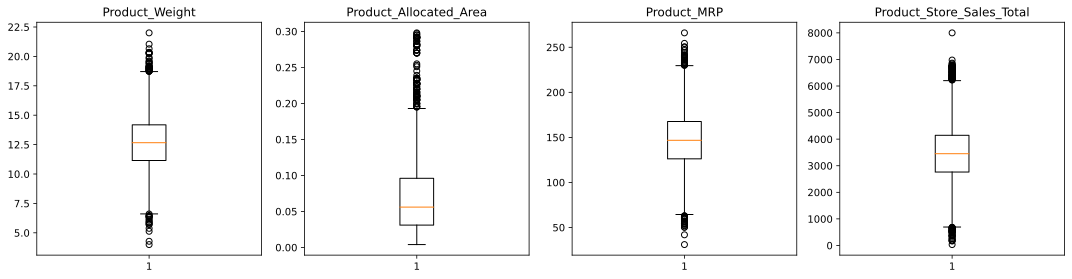

In [76]:
plt.figure(figsize = (15, 4))

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- We see that there are potentially might be outliers in the data
- At the same time they all seem plaucible, so will not treat them as they are the most probably correct data

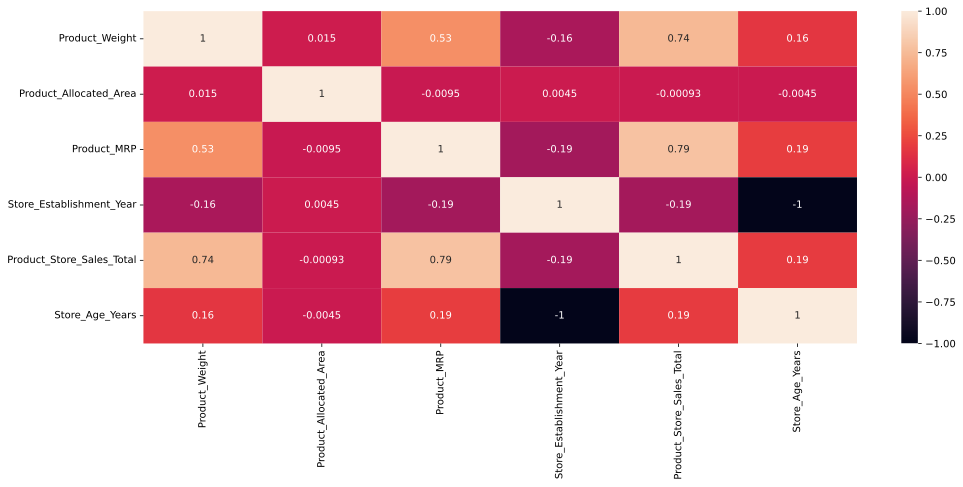

In [77]:
plt.figure(figsize = (16, 6))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**

- There is high positive correlation between:

    - Product_Store_Sales_Total & Product_MRP
    - Product_Store_Sales_Total & Product_Weight

- There is moderate positive correlation between Product_Weight and Product_MRP

- And there is strong correlation between Store Establishment Year and Store Age in Years. 
  Which is very logical, because Store Age was derived from the Store Establishment Year.
    
- Other correlations are either negligeble or slight and meaningless

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [78]:
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [79]:
data = pd.get_dummies(
    data=data,
    columns = data.select_dtypes(include = ['object']).columns.to_list(),
    drop_first = True)

In [80]:
data.head()

Product_Weight  Product_Allocated_Area  Product_MRP  \
0           12.66                   0.027       117.08   
1           16.54                   0.144       171.43   
2           14.28                   0.031       162.08   
3           12.10                   0.112       186.31   
4            9.57                   0.010       123.67   

   Product_Store_Sales_Total  Store_Age_Years  Product_Sugar_Content_No Sugar  \
0                    2842.40               12                               0   
1                    4830.02               22                               0   
2                    4130.16               34                               0   
3                    4132.18               34                               0   
4                    2279.36               23                               1   

   Product_Sugar_Content_Regular  Store_Size_Medium  Store_Size_Small  \
0                              0                  1                 0   
1                              0                  1                 0   
2                              1                  0                 0   
3                              0                  0                 0   
4                              0                  0                 1   

   Store_Location_City_Type_Tier 2  Store_Location_City_Type_Tier 3  \
0                                1                                0   
1                                0                                0   
2                                1                                0   
3                                1                                0   
4                                0                                1   

   Store_Type_Food Mart  Store_Type_Supermarket Type1  \
0                     0                             0   
1                     0                             0   
2                     0                             1   
3                     0                             1   
4                     1                             0   

   Store_Type_Supermarket Type2  Product_Id_char_FD  Product_Id_char_NC  \
0                             1                   1                   0   
1                             0                   1                   0   
2                             0                   1                   0   
3                             0                   1                   0   
4                             0                   0                   1   

   Product_Type_Category_Perishables  
0                                  0  
1                                  1  
2                                  0  
3                                  0  
4                                  0

In [81]:
# Separating features and the target column
X = data.drop(['Product_Store_Sales_Total'], axis=1)
y = data['Product_Store_Sales_Total']

In [82]:
X = sm.add_constant(X)

In [83]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [84]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6134, 17) (2629, 17)
(6134,) (2629,)


### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train).sort_values('VIF',ascending = False))

                              feature       VIF
8                    Store_Size_Small       inf
13       Store_Type_Supermarket Type2       inf
15                 Product_Id_char_NC       inf
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
7                   Store_Size_Medium       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
14                 Product_Id_char_FD  2.805502
3                         Product_MRP  1.906009
1                      Product_Weight  1.759488
16  Product_Type_Category_Perishables  1.224587
6       Product_Sugar_Content_Regular  1.086432
2              Product_Allocated_Area  1.001160
0                               const  0.000000


**Observations:**
- The VIF of 'Product_Id_char_FD','Product_MRP','Product_Weight','Product_Type_Category_Perishables','Product_Sugar_Content_Regular' and 'Product_Allocated_Area' is less than 5.
- The VIF for of the dummy variables is inf, but this is expected as dummy variables tend to have high VIF
- At the same time Store Age Years has inf VIF, this is continuous variable, it shouldn't be the case, so let's drop it. 

In [86]:
X_train = X_train.drop(['Store_Age_Years'],axis = 1)

X_test = X_test.drop(['Store_Age_Years'],axis = 1)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = X_train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train).sort_values('VIF', ascending=False))

                              feature       VIF
4      Product_Sugar_Content_No Sugar       inf
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_NC       inf
13                 Product_Id_char_FD  2.805502
3                         Product_MRP  1.906009
1                      Product_Weight  1.759488
15  Product_Type_Category_Perishables  1.224587
5       Product_Sugar_Content_Regular  1.086432
2              Product_Allocated_Area  1.001160
0                               const  0.000000


**Observations:**

 - We can proceed to modeling with columns we have

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly. 

In [88]:
def r2score(y_pred, y_true):
    
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.average(y_true)) ** 2)

    return r2

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test
    
    

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2score(y_pred_train, y_observed_train),
                    r2score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [90]:
# Create the OLS model and fit it
model1 = sm.OLS(y_train, X_train).fit()

In [91]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.816
Model:                                   OLS   Adj. R-squared:                  0.815
Method:                        Least Squares   F-statistic:                     2710.
Date:                       Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                               03:38:01   Log-Likelihood:                -46291.
No. Observations:                       6134   AIC:                         9.260e+04
Df Residuals:                           6123   BIC:                         9.268e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               201.5820     43.590      4.625      0.000     116.130     287.034
Product_Weight                      135.8641      3.505     38.766      0.000     128.994     142.735
Product_Allocated_Area             -149.2122    122.375     -1.219      0.223    -389.110      90.686
Product_MRP                          12.5628      0.263     47.830      0.000      12.048      13.078
Product_Sugar_Content_No Sugar       17.8034     12.645      1.408      0.159      -6.984      42.591
Product_Sugar_Content_Regular        19.7746     13.738      1.439      0.150      -7.157      46.706
Store_Size_Medium                   407.4963     27.019     15.082      0.000     354.530     460.463
Store_Size_Small                   -383.4380      5.950    -64.447      0.000    -395.101    -371.775
Store_Location_City_Type_Tier 2    -306.5917      9.023    -33.980      0.000    -324.279    -288.904
Store_Location_City_Type_Tier 3    -383.4380      5.950    -64.447      0.000    -395.101    -371.775
Store_Type_Food Mart               -383.4380      5.950    -64.447      0.000    -395.101    -371.775
Store_Type_Supermarket Type1        177.5236     18.229      9.738      0.000     141.788     213.259
Store_Type_Supermarket Type2       -484.1153     17.534    -27.611      0.000    -518.487    -449.743
Product_Id_char_FD                    9.7263     22.584      0.431      0.667     -34.546      53.998
Product_Id_char_NC                   17.8034     12.645      1.408      0.159      -6.984      42.591
Product_Type_Category_Perishables    15.2126     13.588      1.120      0.263     -11.424      41.849
==============================================================================
Omnibus:                     1819.130   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44456.658
Skew:                           0.861   Prob(JB):                         0.00
Kurtosis:                      16.076   Cond. No.                     3.73e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
# Checking model1 performance
model_pref(model1, X_train, X_test)

    Data        RMSE         MAE       r2
0  Train  458.377487  269.559614  0.81568
1   Test  418.450751  253.123998  0.84424


**Observations:**

- The model is not overfitting and givving us quite good metrics. Let's try to improve the model further.  

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [93]:
X_train1 = X_train.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)
X_test1 = X_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [94]:
# Create the OLS model and fit it
model2 = sm.OLS(y_train,X_train1).fit()

In [95]:
# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.816
Model:                                   OLS   Adj. R-squared:                  0.815
Method:                        Least Squares   F-statistic:                     3387.
Date:                       Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                               03:38:01   Log-Likelihood:                -46292.
No. Observations:                       6134   AIC:                         9.260e+04
Df Residuals:                           6125   BIC:                         9.266e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             212.0177     41.604      5.096      0.000     130.459     293.577
Product_Weight                    135.8334      3.504     38.761      0.000     128.964     142.703
Product_Allocated_Area           -151.6686    122.355     -1.240      0.215    -391.528      88.191
Product_MRP                        12.5643      0.263     47.841      0.000      12.049      13.079
Product_Sugar_Content_No Sugar     10.1650      8.092      1.256      0.209      -5.698      26.028
Product_Sugar_Content_Regular      19.5743     13.727      1.426      0.154      -7.335      46.484
Store_Size_Medium                 412.8611     26.184     15.768      0.000     361.532     464.190
Store_Size_Small                 -381.6956      5.562    -68.621      0.000    -392.600    -370.791
Store_Location_City_Type_Tier 2  -305.0116      8.785    -34.720      0.000    -322.233    -287.790
Store_Location_City_Type_Tier 3  -381.6956      5.562    -68.621      0.000    -392.600    -370.791
Store_Type_Food Mart             -381.6956      5.562    -68.621      0.000    -392.600    -370.791
Store_Type_Supermarket Type1      180.8522     17.732     10.199      0.000     146.092     215.612
Store_Type_Supermarket Type2     -485.8639     17.398    -27.926      0.000    -519.971    -451.757
Product_Id_char_NC                 10.1650      8.092      1.256      0.209      -5.698      26.028
==============================================================================
Omnibus:                     1817.028   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44522.197
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                      16.086   Cond. No.                     4.54e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  458.447119  269.601083  0.815624
1   Test  418.421166  253.122120  0.844262


**Observations:**

- We managed to impove test accuracy even further. So let's check our model for the fundamental assumptions. 

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [97]:
residuals = model2.resid

np.mean(residuals)

-7.86548336153412e-12

**Observations:**

- The mean of residuals is very close to zero. So condition number 1 is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [98]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [99]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 0.8609417469781496), ('p-value', 0.9999823530434234)]

**Observations:**

- We can reject the null hypothesis, so our model is heteroscedastic. 

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

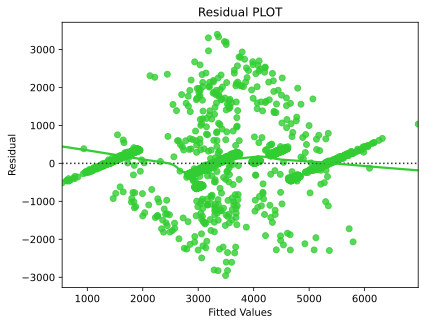

In [100]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "limegreen", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- There is no clear pattern, so the condition for linearity of the variables is satisfied. 

### **4. Normality of error terms**

The residuals should be normally distributed.

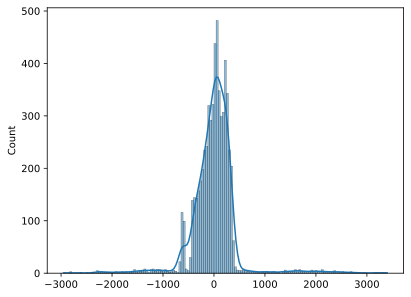

In [101]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
plt.show()

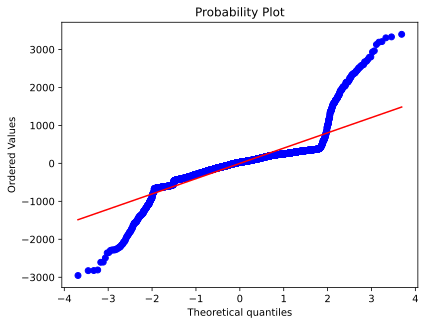

In [102]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**

- We can conclude that the residuals are normally distributed and the last condition is satisfied. 

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [103]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score1 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score2 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_root_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std() * 2))
print("Root Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std() * 2))

RSquared: 0.814 (+/- 0.049)
Root Mean Squared Error: 458.922 (+/- 55.156)


**Observation:**

- We see that we get very close result to train and test metrics we calculated before. The model can be used for sales forecast for the next quarter. 

## **Actionable Insights and Business Recommendations**

- We propose to  use model2 as forecasting model to predict the total sales that will be done by SuperKart in the next quarter.
- The model explains around 81.4% of the variation in the data.
- In order to further improve the model it might be beneficial to collect also information about gender, age and socio-economical status of the customers who made purchases. 
- It also might be beneficial to collect information about population in each of the locations and median earnings across it. 